In [1]:
import pandas as pd 
import numpy as np 

In [2]:
incs = pd.read_csv('./incidents_processed.csv', sep="\t", low_memory=False)

In [70]:
incs.head(3)
# cls = ['Hazard', 'Fire', 'No Inj', 'Unknn Inj', '1141', 'AnimalHazard', 'CarFire']
# demo = filtered_df = df[df['incs'] > 20]
demo = incs.DESCRIPTION
mapping = {"1125-Traffic Hazard": "Traffic Hazard", '1125A-Animal Hazard': 'Animal Hazard', '1183-Trfc Collision-Unkn Inj': "w/Injuries", '1182-Trfc Collision-No Inj' :'No Inj', "20002-Hit and Run No Injuries": 'No Inj', "20001-Hit and Run w/Injuries": "w/Injuries", "1179-Trfc Collision-1141 Enrt": '1141', "1181-Trfc Collision-Minor Inj": "w/Injuries", "1180-Trfc Collision-Major Inj": "w/Injuries"}
demo['mapping'] = demo.apply(lambda x: mapping[x] if x in mapping.keys() else "Others")

/tmp/ipykernel_100840/2479750275.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['mapping'] = demo.apply(lambda x: mapping[x] if x in mapping.keys() else "Others")


In [71]:
demo['mapping'].value_counts()

Traffic Hazard    221424
No Inj             79425
w/Injuries         70290
1141               32697
Others             11147
Animal Hazard       9289
Name: DESCRIPTION, dtype: int64

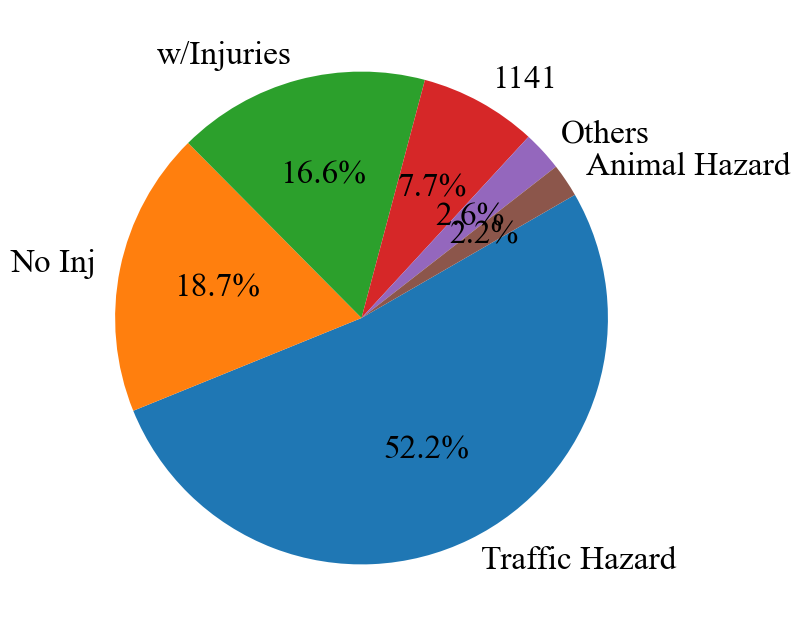

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 24, 'font.family': 'Times New Roman'})
# 计算 Category 列中每个唯一值的占比
value_counts = demo['mapping'].value_counts()
percentages = value_counts / value_counts.sum() * 100

# 绘制饼图
percentages.plot.pie(
    figsize=(8, 8), 
    autopct='%1.1f%%', 
    startangle=30, 
    counterclock=False
)

# 设置标题和显示图表
# plt.title('Category Distribution')
plt.ylabel('')  # 移除 y 轴标签
plt.show()


<AxesSubplot:>

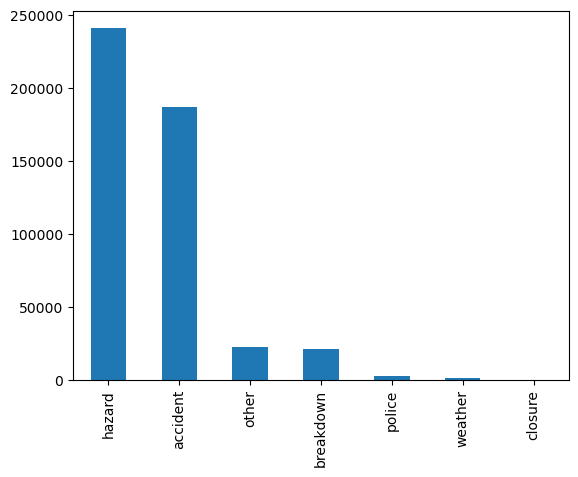

In [4]:
incs.type.value_counts()
incs.type.value_counts().plot(kind='bar')

In [5]:
incs = incs[(incs.type == 'accident') | (incs.type == 'hazard')]
incs.shape

(428341, 12)

In [6]:
# 修正日期上的问题
def adjust_date(x):
    try:
        date_str = x['Start Time'].split(' ')
        month, day, year = date_str[0].split('/')
        if not year.startswith('20'):
            year = '20' + year
        return f'{month}/{day}/{year} {date_str[1]}'
    except:
        return np.nan
# incs = incs.iloc[:100]
incs['datetime'] = incs.apply(adjust_date, axis=1)
incs['datetime'] = pd.to_datetime(incs['datetime'])
incs = incs.sort_values(by=['datetime']).dropna()
incs.head(3)

,Incident Id,Start Time,Duration (mins),Freeway,CA PM,Abs PM,Source,AREA,LOCATION,DESCRIPTION,type,nearest_node,datetime
25,21379357,01/03/2023 8:54,179,I10-E,R56.68,142.5,CHP,Indio,I10 E WO / SR86,20002-Hit and Run No Injuries,accident,819910,2023-01-03 08:54:00
208946,21379356,01/03/2023 10:51,2,I10-E,R17.89,103.8,CHP,San Gorgonio Pass,I10 E / Morongo Tr Onr,ANIMAL-Live or Dead Animal,hazard,821334,2023-01-03 10:51:00
208944,21379341,01/03/2023 11:21,57,I8-W,R0.643,2.6,CHP,San Diego,I8 W / Rosecrans Eo,FLOOD-Roadway Flooding,hazard,1114546,2023-01-03 11:21:00


In [7]:
p01_data = np.load('./p01_done.npy')
print(p01_data.shape)

(8928, 16972, 3)


In [9]:
from sklearn.preprocessing import StandardScaler
nan_flat=np.isnan(p01_data)
data=np.nan_to_num(p01_data)
data[:, :, 0] = StandardScaler().fit_transform(data[:, :, 0])
data[:, :, 1] = StandardScaler().fit_transform(data[:, :, 1])
data[:, :, 2] = StandardScaler().fit_transform(data[:, :, 2])
data[nan_flat]=np.nan
p01_data = data

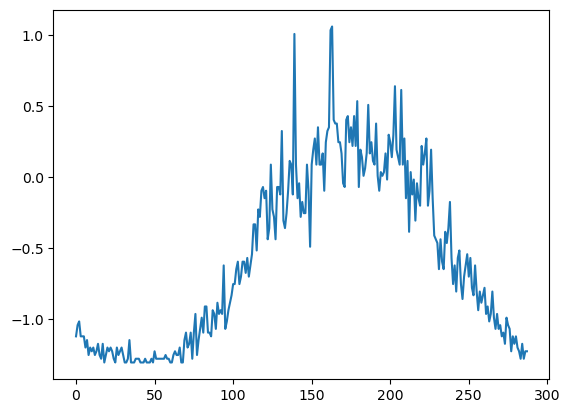

In [10]:
import matplotlib.pyplot as plt
plt.plot(p01_data[:288, 1,0]) 
# p01_data

In [11]:
node_list = np.load('./node_list.npy')
len(node_list)

16972

In [12]:
df_p01_data_speed = pd.DataFrame(p01_data[:, :, 2], columns=node_list.tolist())
df_p01_data_occ = pd.DataFrame(p01_data[:, :, 1], columns=node_list.tolist())
df_p01_data_flow = pd.DataFrame(p01_data[:, :, 0], columns=node_list.tolist())
start_time = pd.Timestamp('01/01/2023 00:00')
time_index = pd.date_range(start=start_time, periods=df_p01_data_speed.shape[0], freq='5min')
df_p01_data_speed.index = time_index

df_p01_data_occ.index = time_index
df_p01_data_flow.index = time_index
df_p01_data_speed.head(10)

,1210574,501021032,314421,10119710,1211784,819941,1038410,770545,407290,767801,...,716382,717851,320430,716658,316928,403183,601251,408004,402138,320457
2023-01-01 00:00:00,NaN,0.338505,0.947572,1.060122,0.831724,0.711642,NaN,NaN,NaN,-2.364570,...,0.604429,0.647836,NaN,1.030377,0.667479,0.411101,NaN,NaN,0.811205,NaN
2023-01-01 00:05:00,NaN,0.316972,0.956943,1.214370,0.891675,-0.464968,NaN,NaN,NaN,-2.401101,...,0.809312,0.635470,NaN,0.978573,-0.114883,0.462386,NaN,NaN,0.471175,NaN
2023-01-01 00:10:00,NaN,0.338505,0.853867,1.229794,0.891675,-1.473491,NaN,NaN,NaN,-2.437631,...,0.809312,0.610736,NaN,0.978573,0.229356,0.349560,NaN,NaN,0.471175,NaN
2023-01-01 00:15:00,NaN,0.360038,0.807015,1.229794,0.891675,-0.399902,NaN,NaN,NaN,-2.547224,...,0.809312,0.623103,NaN,0.978573,0.385829,0.370074,NaN,NaN,0.471175,NaN
2023-01-01 00:20:00,NaN,0.381570,0.778903,1.183520,0.891675,0.082670,NaN,NaN,NaN,-2.620285,...,0.604429,0.586003,NaN,0.952671,0.542301,0.482899,NaN,NaN,0.675193,NaN
2023-01-01 00:25:00,NaN,0.360038,0.788274,1.160383,0.891675,0.386312,NaN,NaN,NaN,-2.583754,...,0.019050,0.598370,NaN,0.926769,0.657048,0.370074,NaN,NaN,0.505178,NaN
2023-01-01 00:30:00,NaN,0.316972,0.863238,1.144958,0.891675,0.521866,NaN,NaN,NaN,-2.949061,...,0.926387,0.660203,NaN,0.926769,0.479712,0.349560,NaN,NaN,0.369166,NaN
2023-01-01 00:35:00,NaN,0.446169,0.825756,1.137246,0.891675,0.619465,NaN,NaN,NaN,-3.058654,...,0.721505,0.647836,NaN,0.952671,0.396260,0.370074,NaN,NaN,0.165148,NaN
2023-01-01 00:40:00,NaN,0.360038,0.535270,1.121821,0.891675,0.646576,NaN,NaN,NaN,-2.876000,...,0.897118,0.623103,NaN,0.952671,0.521438,0.411101,NaN,NaN,0.505178,NaN
2023-01-01 00:45:00,NaN,0.338505,0.535270,1.121821,0.891675,0.662842,NaN,NaN,NaN,-2.729877,...,0.516622,0.660203,NaN,0.978573,0.594459,0.411101,NaN,NaN,0.607187,NaN


In [13]:
1215418 in df_p01_data_speed.columns

True

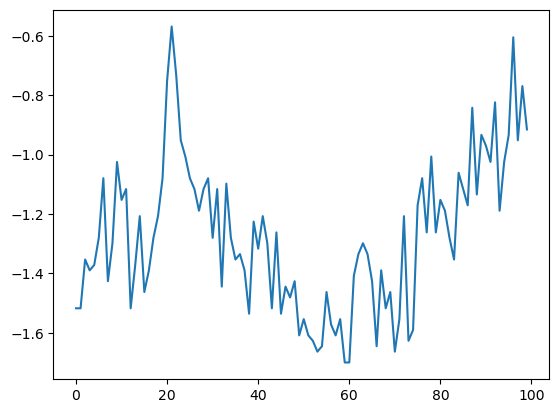

In [14]:
import matplotlib.pyplot as plt
plt.plot(df_p01_data_flow.loc[:, 1215418].values[:100])

In [15]:
def rounded_datetime(given_time):
    given_datetime = given_time.to_pydatetime()

    # 取整到最近的5分钟倍数
    # 首先找到最接近的5分钟倍数的分钟数，然后重新构建datetime对象
    rounded_minute = int(5 * np.floor(given_datetime.minute / 5))
    rounded_datetime = given_datetime.replace(minute=rounded_minute, second=0, microsecond=0)

    # 将datetime对象转换回Timestamp
    rounded_time = pd.Timestamp(rounded_datetime)
    return rounded_time

incs.datetime = incs.datetime.apply(rounded_datetime)
incs.head(3)

,Incident Id,Start Time,Duration (mins),Freeway,CA PM,Abs PM,Source,AREA,LOCATION,DESCRIPTION,type,nearest_node,datetime
25,21379357,01/03/2023 8:54,179,I10-E,R56.68,142.5,CHP,Indio,I10 E WO / SR86,20002-Hit and Run No Injuries,accident,819910,2023-01-03 08:50:00
208946,21379356,01/03/2023 10:51,2,I10-E,R17.89,103.8,CHP,San Gorgonio Pass,I10 E / Morongo Tr Onr,ANIMAL-Live or Dead Animal,hazard,821334,2023-01-03 10:50:00
208944,21379341,01/03/2023 11:21,57,I8-W,R0.643,2.6,CHP,San Diego,I8 W / Rosecrans Eo,FLOOD-Roadway Flooding,hazard,1114546,2023-01-03 11:20:00


In [16]:
incs['start_time'] = incs.datetime - pd.Timedelta(minutes=10)
incs['end_time'] = incs.datetime + pd.Timedelta(minutes=45+60)
incs.head(3)
incs.columns
ans = incs[:30000].drop(columns=['Freeway', 'CA PM',
       'Abs PM', 'Source', 'AREA', 'LOCATION'])
ans.head(3)

,Incident Id,Start Time,Duration (mins),DESCRIPTION,type,nearest_node,datetime,start_time,end_time
25,21379357,01/03/2023 8:54,179,20002-Hit and Run No Injuries,accident,819910,2023-01-03 08:50:00,2023-01-03 08:40:00,2023-01-03 10:35:00
208946,21379356,01/03/2023 10:51,2,ANIMAL-Live or Dead Animal,hazard,821334,2023-01-03 10:50:00,2023-01-03 10:40:00,2023-01-03 12:35:00
208944,21379341,01/03/2023 11:21,57,FLOOD-Roadway Flooding,hazard,1114546,2023-01-03 11:20:00,2023-01-03 11:10:00,2023-01-03 13:05:00


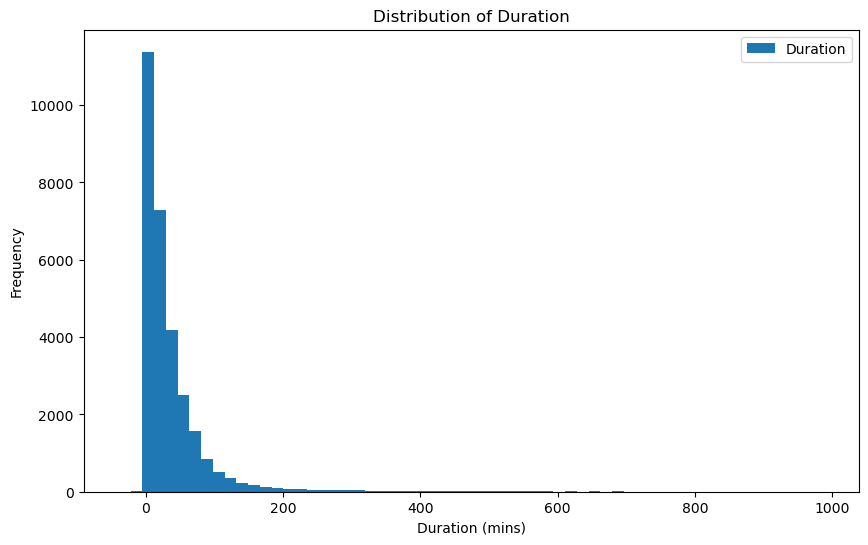

121.0

In [17]:

import matplotlib.pyplot as plt
# 添加标签
# plt.rcParams.update({'font.size': 12, 'font.family': 'Times New Roman'})

plt.xlabel('Duration (mins)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration')

# 显示网格线
plt.grid(True)
ans['Duration (mins)'].replace("nan", np.nan).dropna().astype(float).plot.hist(bins=60, figsize=(10, 6))
import pickle as pkl
pkl.dump(ans['Duration (mins)'].replace("nan", np.nan).dropna().astype(float).values, open('duration.pkl', 'wb'))
# 显示图例
plt.legend(['Duration'])
plt.show()
ans['Duration (mins)'].replace("nan", np.nan).dropna().astype(float).quantile(0.95)

In [18]:
ans['Duration (mins)'].replace('nan', np.nan).astype(float).mean(skipna=True)

37.77543333333333

In [19]:
def append_speed(row):
    if row.nearest_node in df_p01_data_speed.columns:
        row['speed_nearest_node'] = df_p01_data_speed.loc[row.start_time: row.end_time, row.nearest_node].values
        row['occ_nearest_node'] = df_p01_data_occ.loc[row.start_time: row.end_time, row.nearest_node].values
        row['flow_nearest_node'] = df_p01_data_flow.loc[row.start_time: row.end_time, row.nearest_node].values
        # if np.sum(np.isnan(row['speed_nearest_node'])) / len(row['speed_nearest_node']) < 0.1:
        if np.sum(np.isnan(row['speed_nearest_node'])) == 0 and np.sum(np.isnan(row['occ_nearest_node'])) == 0 and np.sum(np.isnan(row['flow_nearest_node'])) == 0:
            pass
        else:
            row['speed_nearest_node'] = np.nan
    else: 
        row['speed_nearest_node'] = np.nan
    return row
ans = ans.apply(append_speed, axis=1)

In [20]:
ans.head(10)

,DESCRIPTION,Duration (mins),Incident Id,Start Time,datetime,end_time,flow_nearest_node,nearest_node,occ_nearest_node,speed_nearest_node,start_time,type
25,20002-Hit and Run No Injuries,179,21379357,01/03/2023 8:54,2023-01-03 08:50:00,2023-01-03 10:35:00,"[1.2880479808431453, 0.9308386079031526, 0.420...",819910,"[2.4605148228541776, 1.7046585883463667, 1.200...",NaN,2023-01-03 08:40:00,accident
208946,ANIMAL-Live or Dead Animal,2,21379356,01/03/2023 10:51,2023-01-03 10:50:00,2023-01-03 12:35:00,"[-0.6160867775767869, -0.6772882679989952, -0....",821334,"[0.4820847479033607, 0.14312859865051844, 1.16...","[-0.8013060639492926, -0.6407679372760642, -0....",2023-01-03 10:40:00,hazard
208944,FLOOD-Roadway Flooding,57,21379341,01/03/2023 11:21,2023-01-03 11:20:00,2023-01-03 13:05:00,NaN,1114546,NaN,NaN,2023-01-03 11:10:00,hazard
14,1179-Trfc Collision-1141 Enrt,240,21379290,01/03/2023 11:48,2023-01-03 11:45:00,2023-01-03 13:30:00,"[0.766771814319427, 0.8426272567792329, 0.7604...",776229,"[0.5882988289206792, 0.8107773127630407, 0.836...","[-0.5235332601309831, -0.49946803243831706, -0...",2023-01-03 11:35:00,accident
21,1183-Trfc Collision-Unkn Inj,150,21379340,01/03/2023 11:52,2023-01-03 11:50:00,2023-01-03 13:35:00,NaN,1122450,NaN,NaN,2023-01-03 11:40:00,accident
13,1183-Trfc Collision-Unkn Inj,85,21379289,01/03/2023 12:12,2023-01-03 12:10:00,2023-01-03 13:55:00,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",769374,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,2023-01-03 12:00:00,accident
208945,1125-Traffic Hazard,386,21379353,01/03/2023 12:13,2023-01-03 12:10:00,2023-01-03 13:55:00,"[-0.3496719648309159, -0.38617419284490495, 0....",1215418,"[-0.2897896506975932, -0.2434748036147982, 0.0...","[0.3125446395618101, 0.25137288455569906, 0.41...",2023-01-03 12:00:00,hazard
208931,1125-Traffic Hazard,82,21379248,01/03/2023 12:28,2023-01-03 12:25:00,2023-01-03 14:10:00,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",415727,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,2023-01-03 12:15:00,hazard
209000,FLOOD-Roadway Flooding,163,21379513,01/03/2023 12:34,2023-01-03 12:30:00,2023-01-03 14:15:00,"[0.21896244281196064, 1.1108820664701842, 0.28...",405878,"[-0.11904525568454177, 0.2017276282615381, -0....",NaN,2023-01-03 12:20:00,hazard
4,1182-Trfc Collision-No Inj,60,21379247,01/03/2023 12:38,2023-01-03 12:35:00,2023-01-03 14:20:00,"[0.6401598143836809, 1.0627448563733046, 0.626...",403092,"[0.4336620998764004, 0.6968728888716385, 0.371...","[-0.09218532445782959, 0.015937452310423973, 0...",2023-01-03 12:25:00,accident


In [21]:
def normal_dataselect(row):
    if row.nearest_node in df_p01_data_speed.columns:
        row['speed_nearest_node'] = df_p01_data_speed.loc[row.start_time - pd.Timedelta(hours=24): row.end_time - pd.Timedelta(hours=24), row.nearest_node].values
        row['occ_nearest_node'] = df_p01_data_occ.loc[row.start_time - pd.Timedelta(hours=24): row.end_time - pd.Timedelta(hours=24), row.nearest_node].values
        row['flow_nearest_node'] = df_p01_data_flow.loc[row.start_time - pd.Timedelta(hours=24): row.end_time - pd.Timedelta(hours=24), row.nearest_node].values
        # if np.sum(np.isnan(row['speed_nearest_node'])) / len(row['speed_nearest_node']) < 0.1:
        if np.sum(np.isnan(row['speed_nearest_node'])) == 0 and np.sum(np.isnan(row['occ_nearest_node'])) == 0 and np.sum(np.isnan(row['flow_nearest_node'])) == 0:
            pass
        else:
            row['speed_nearest_node'] = np.nan
    else: 
        row['speed_nearest_node'] = np.nan
    return row
norm_data = pd.DataFrame(columns=["start_time", "end_time", "nearest_node"])# .apply(normal_dataselect, axis=1)
norm_data = ans.loc[:, ["start_time", "end_time", "nearest_node"]].apply(normal_dataselect, axis=1).apply(normal_dataselect, axis=1).dropna()
norm_data.dropna()[norm_data.dropna()['nearest_node'] != -1].head(3)

,end_time,flow_nearest_node,nearest_node,occ_nearest_node,speed_nearest_node,start_time
208946,2023-01-03 12:35:00,"[-0.4324823063101618, -0.4936837967323702, -1....",821334,"[0.5574083366262146, 0.5323004737185968, -0.50...","[-0.5935508411957028, -0.6690981949242808, -0....",2023-01-03 10:40:00
14,2023-01-03 13:30:00,"[0.741486666832825, 0.8299846830359319, 0.8110...",776229,"[0.8980573333473517, 0.9648008785000601, 0.745...","[-0.49946803243831706, -0.5235332601309831, -0...",2023-01-03 11:35:00
208945,2023-01-03 13:55:00,"[1.0009104716866777, 1.0009104716866777, 0.854...",1215418,"[0.3123033613787414, 0.43715207960192776, 0.16...","[-0.15236069848463352, -0.15236069848463352, -...",2023-01-03 12:00:00


In [22]:
norm_data.dropna()[norm_data.dropna()['nearest_node'] != -1].shape
ans1 = ans
def select_data(row):
    row['selected'] = True
    time_data = ans1[ans1.nearest_node == row.nearest_node].loc[:, ['Start Time', 'Duration (mins)']].values
    for st, dur in zip(time_data[:, 0], time_data[:, 1]):
        if (row.end_time < pd.to_datetime(st) + pd.Timedelta(minutes=int(dur)) and row.start_time < pd.to_datetime(st)):
            continue
        elif row.start_time > pd.to_datetime(st) + pd.Timedelta(minutes=int(dur)):
            continue
        else:
            row['selected'] = False
    return row

norm_data = norm_data.apply(select_data, axis=1)

In [23]:
norm_data[norm_data['selected'] == True].shape
norm_data['type'] = 'normal'

In [24]:
ans.dropna().head(10)
ans.dropna()[ans.dropna()['nearest_node'] != -1].shape

(15666, 12)

In [26]:
ans2 = pd.concat([ans.dropna()[ans.dropna()['nearest_node'] != -1].loc[:, ["speed_nearest_node", "occ_nearest_node", "flow_nearest_node", 'type']][:6000],  norm_data.loc[:, ["speed_nearest_node", "occ_nearest_node", "flow_nearest_node", 'type']][:3000]])
category_codes, category_unique = pd.factorize(ans2['type'])
ans2['category_codes'] = category_codes
unique_elements, counts = np.unique(ans2['category_codes'].values, return_counts=True)
elements_greater_than_20 = unique_elements[counts > 300]
new_index_mapping = {element: index for index, element in enumerate(elements_greater_than_20, start=0)}
def map_category_codes(x):
    x["category_codes"] = new_index_mapping[x["category_codes"]] if x["category_codes"] in new_index_mapping.keys() else -1
    return x
ans2 = ans2.apply(map_category_codes, axis=1)
ans2 = ans2[ans2["category_codes"] != -1]
print(ans2.type.unique())
ans2.shape

['hazard' 'accident' 'normal']


(9000, 5)

In [27]:
ans2.head(4)

,speed_nearest_node,occ_nearest_node,flow_nearest_node,type,category_codes
208946,"[-0.8013060639492926, -0.6407679372760642, -0....","[0.4820847479033607, 0.14312859865051844, 1.16...","[-0.6160867775767869, -0.6772882679989952, -0....",hazard,0
14,"[-0.5235332601309831, -0.49946803243831706, -0...","[0.5882988289206792, 0.8107773127630407, 0.836...","[0.766771814319427, 0.8426272567792329, 0.7604...",accident,1
208945,"[0.3125446395618101, 0.25137288455569906, 0.41...","[-0.2897896506975932, -0.2434748036147982, 0.0...","[-0.3496719648309159, -0.38617419284490495, 0....",hazard,0
4,"[-0.09218532445782959, 0.015937452310423973, 0...","[0.4336620998764004, 0.6968728888716385, 0.371...","[0.6401598143836809, 1.0627448563733046, 0.626...",accident,1


In [30]:
# 1. 导入所需的库
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
# 2. 准备数据
# 加载iris数据集作为示例
iris = load_iris()
X = np.array(ans2.speed_nearest_node.values.tolist())
x_sp = np.array(ans2.speed_nearest_node.values.tolist())
x_occ = np.array(ans2.occ_nearest_node.values.tolist())
x_flow = np.array(ans2.flow_nearest_node.values.tolist())
y = ans2.category_codes.values

In [33]:
X = np.concatenate([x_sp, x_occ, x_flow], axis=1)

In [47]:

# 3. 划分数据集
X = x_flow
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
import pickle as pkl
pkl.dump({'x': [X_train, X_test], 'y': [y_train.astype(int), y_test.astype(int)]}, open('./traffic_data.pkl', 'wb'))
# 4. 创建决策树模型
# 创建决策树分类器实例，可以添加参数来控制树的复杂度，例如max_depth
clf = DecisionTreeClassifier(random_state=42)

# 5. 训练模型
clf.fit(X_train, y_train)

# 6. 预测
y_pred = clf.predict(X_test)

# 7. 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.3937037037037037


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix
# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 计算每个类别的准确率
class_accuracies = {}
for i in range(len(conf_matrix)):
    class_accuracies[i] = conf_matrix[i, i] / np.sum(conf_matrix[i, :])
print(class_accuracies)

{0: 0.41968911917098445, 1: 0.37964071856287424, 2: 0.3788888888888889}


In [49]:
from sklearn.metrics import precision_score, recall_score
# 计算精确率和召回率
precision = precision_score(y_test, y_pred, average='macro')  # None表示计算每个类别的分数
recall = recall_score(y_test, y_pred, average='macro')

# 打印结果
print(accuracy_score(y_test, y_pred))
print(f"{precision}")
print(f"{recall}")

0.3937037037037037
0.3927511369706142
0.3927395755409158
